In [79]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [101]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_f0bc0433f93b4a518afbc629bf26a345 = 'https://s3.eu-geo.objectstorage.softlayer.net'
else:
    endpoint_f0bc0433f93b4a518afbc629bf26a345 = 'https://s3.eu-geo.objectstorage.service.networklayer.com'

client_f0bc0433f93b4a518afbc629bf26a345 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jv0kAVVZbpvFpaJ74gfG2adjghFsb0rafZpkxkW4E99Z',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_f0bc0433f93b4a518afbc629bf26a345)

body = client_f0bc0433f93b4a518afbc629bf26a345.get_object(Bucket='jcomponentfinalreview-donotdelete-pr-v8a4bumdugke5p',Key='traindata (2).csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

train_data = pd.read_csv(body)
train_data.head()


,Name,Age,Gender,Blood Group,Blood Pressure,Diabities,Headaches,Infuenza,Thypoid,Major Side Effects
0,Eloy Fairchild,12.0,1,1,0,0,0,0,0,0
1,Indira Meagher,15.0,2,2,0,0,1,1,0,0
2,Alida Fannon,16.0,2,-1,0,0,0,1,0,0
3,Florance Eslinger,25.0,1,-1,0,0,0,1,0,0
4,Amparo Middlebrooks,28.0,1,3,0,0,0,1,0,0


In [102]:
train_data
a=train_data


In [103]:
train_data.head()


,Name,Age,Gender,Blood Group,Blood Pressure,Diabities,Headaches,Infuenza,Thypoid,Major Side Effects
0,Eloy Fairchild,12.0,1,1,0,0,0,0,0,0
1,Indira Meagher,15.0,2,2,0,0,1,1,0,0
2,Alida Fannon,16.0,2,-1,0,0,0,1,0,0
3,Florance Eslinger,25.0,1,-1,0,0,0,1,0,0
4,Amparo Middlebrooks,28.0,1,3,0,0,0,1,0,0


In [104]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                100 non-null    object 
 1   Age                 95 non-null     float64
 2   Gender              100 non-null    int64  
 3   Blood Group         100 non-null    int64  
 4   Blood Pressure      100 non-null    int64  
 5   Diabities           100 non-null    int64  
 6   Headaches           100 non-null    int64  
 7   Infuenza            100 non-null    int64  
 8   Thypoid             100 non-null    int64  
 9   Major Side Effects  100 non-null    int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 7.9+ KB


In [105]:
train_data.isnull().sum()

Name                  0
Age                   5
Gender                0
Blood Group           0
Blood Pressure        0
Diabities             0
Headaches             0
Infuenza              0
Thypoid               0
Major Side Effects    0
dtype: int64

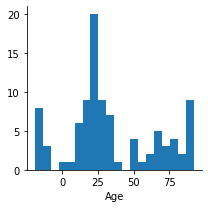

In [106]:
g = sns.FacetGrid(train_data)
g.map(plt.hist, 'Age', bins=20)

In [107]:
train_data['Age'].mean()

34.357894736842105

In [108]:
train_data['Age'].median()

25.0

In [109]:
train_data['Age']=train_data['Age'].fillna(value=train_data['Age'].median())

In [110]:
train_data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Group           0
Blood Pressure        0
Diabities             0
Headaches             0
Infuenza              0
Thypoid               0
Major Side Effects    0
dtype: int64

In [111]:
train_data.head()

,Name,Age,Gender,Blood Group,Blood Pressure,Diabities,Headaches,Infuenza,Thypoid,Major Side Effects
0,Eloy Fairchild,12.0,1,1,0,0,0,0,0,0
1,Indira Meagher,15.0,2,2,0,0,1,1,0,0
2,Alida Fannon,16.0,2,-1,0,0,0,1,0,0
3,Florance Eslinger,25.0,1,-1,0,0,0,1,0,0
4,Amparo Middlebrooks,28.0,1,3,0,0,0,1,0,0


In [112]:
train_data.drop(['Name'],axis=1,inplace=True)
train_data.head()

,Age,Gender,Blood Group,Blood Pressure,Diabities,Headaches,Infuenza,Thypoid,Major Side Effects
0,12.0,1,1,0,0,0,0,0,0
1,15.0,2,2,0,0,1,1,0,0
2,16.0,2,-1,0,0,0,1,0,0
3,25.0,1,-1,0,0,0,1,0,0
4,28.0,1,3,0,0,0,1,0,0


In [113]:
y=train_data['Major Side Effects']


In [114]:
y

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    1
97    0
98    0
99    0
Name: Major Side Effects, Length: 100, dtype: int64

In [116]:
train_data.drop(['Major Side Effects'],axis=1,inplace=True)
train_data.head()

,Age,Gender,Blood Group,Blood Pressure,Diabities,Headaches,Infuenza,Thypoid
0,12.0,1,1,0,0,0,0,0
1,15.0,2,2,0,0,1,1,0
2,16.0,2,-1,0,0,0,1,0
3,25.0,1,-1,0,0,0,1,0
4,28.0,1,3,0,0,0,1,0


In [117]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100)

model.fit(train_data,y)

RandomForestClassifier()

In [118]:

body = client_f0bc0433f93b4a518afbc629bf26a345.get_object(Bucket='jcomponentfinalreview-donotdelete-pr-v8a4bumdugke5p',Key='finalTest_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test_data = pd.read_csv(body)
test_data.head()


,Name,age,gender,blood group,blood pressure,diabities,Headache,Influenza,Typhoid
0,Traci Schomer,52,1,-1,1,0,1,0,0
1,Edwin Sera,44,2,1,1,1,1,0,1
2,Kristel Iles,47,2,1,1,1,1,0,1
3,Zoe Trumble,34,2,2,1,1,1,1,0
4,Janyce Appleberry,51,2,-2,1,1,1,0,0


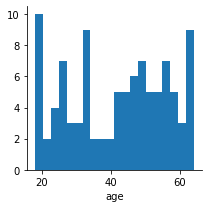

In [119]:
g = sns.FacetGrid(test_data)
g.map(plt.hist, 'age', bins=20)

In [120]:
test_data.isnull().sum()

Name              0
age               0
gender            0
blood group       0
blood pressure    0
diabities         0
Headache          0
Influenza         0
Typhoid           0
dtype: int64

In [121]:
test_data['age']=test_data['age'].fillna(value=test_data['age'].median())

In [122]:
test_data.drop(['Name'],axis=1,inplace=True)
test_data.head()

,age,gender,blood group,blood pressure,diabities,Headache,Influenza,Typhoid
0,52,1,-1,1,0,1,0,0
1,44,2,1,1,1,1,0,1
2,47,2,1,1,1,1,0,1
3,34,2,2,1,1,1,1,0
4,51,2,-2,1,1,1,0,0


In [123]:
#test_data['Sex'] = test_data['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
#test_data.head()

In [124]:
test_data.isnull().sum()

age               0
gender            0
blood group       0
blood pressure    0
diabities         0
Headache          0
Influenza         0
Typhoid           0
dtype: int64

In [125]:
y_pred = model.predict(test_data)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [127]:
Submission = pd.DataFrame({ 'Major Side Effects': y_pred })
Submission.to_csv('raw_data.csv', index=False)


In [128]:
Submission

,Major Side Effects
0,0
1,0
2,0
3,0
4,0
...,...
96,0
97,0
98,0
99,0


In [129]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(train_data,y)

LogisticRegression()

In [132]:
y_pred_Logistic = regressor.predict(test_data)
y_pred_Logistic

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [133]:
Submission = pd.DataFrame({ 'Again got COVID-19': y_pred })
Submission.to_csv("D:\Titanic Datatset\Submission.csv", index=False)

In [134]:
Submission

,Again got COVID-19
0,0
1,0
2,0
3,0
4,0
...,...
96,0
97,0
98,0
99,0


In [135]:

body = client_f0bc0433f93b4a518afbc629bf26a345.get_object(Bucket='jcomponentfinalreview-donotdelete-pr-v8a4bumdugke5p',Key='finalTest_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()
body = client_f0bc0433f93b4a518afbc629bf26a345.get_object(Bucket='jcomponentfinalreview-donotdelete-pr-v8a4bumdugke5p',Key='traindata.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()
body = client_f0bc0433f93b4a518afbc629bf26a345.get_object(Bucket='jcomponentfinalreview-donotdelete-pr-v8a4bumdugke5p',Key='traindata.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

,Name,Age,Gender,Blood Group,Blood Pressure,Diabities,Headaches,Infuenza,Thypoid,Majors Sympotms Seen,Again got COVID-19
0,Eloy Fairchild,12.0,1,1,0,0,0,0,0,1,0
1,Indira Meagher,15.0,2,2,0,0,1,1,0,0,0
2,Alida Fannon,16.0,2,-1,0,0,0,1,0,1,0
3,Florance Eslinger,25.0,1,-1,0,0,0,1,0,0,0
4,Amparo Middlebrooks,28.0,1,3,0,0,0,1,0,0,0


In [136]:
y=train_data['Major Side Effects']

KeyError: 'Major Side Effects'